In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
from utils.split_data import split_to_4quadrants
from utils.preprocess_data import process_raw
from utils.parse_data import parse_paper_data

from baseline_models.single_param_baseline import train_single_param
from baseline_models.student_ability_baseline import train_student_ability
from baseline_models.question_difficulty_baseline import train_question_difficulty

from models.ADP import ADP
from models.I import I
from models.I_without_bias import I_without_bias

In [3]:
paper1_columns = ['Name', 'q1', 'q2', 'q3',
                      'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14',
                      'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24']

# old paper
# paper_csv = "Fwd__Pinpoint_ML_Dataset/9to1_2017_GCSE_1H.csv"
# paper_start = 23

# raw_data = pd.read_csv(paper_csv, low_memory=False)
# exam_data_df, meta_data_df = parse_paper_data(raw_data, paper_start, paper1_columns)

# # new paper
paper_csv = "Fwd__Pinpoint_ML_Dataset\9to1_2017_GCSE_1H_and_2H_and_3H Linked Pinpoint Data_Cleaned.csv"
paper_start = 6

raw_data = pd.read_csv(paper_csv, low_memory=False)
exam_data_df, meta_data_df = parse_paper_data(raw_data, paper_start, paper1_columns)

binarise_method, shuffle = 'mid', 'True'
_, data_ts = process_raw(exam_data_df, meta_data_df, binarise_method, shuffle)
S, Q = data_ts.shape[0], data_ts.shape[1]

print(f"binarise_method={binarise_method}, shuffle={shuffle}")

binarise_method=mid, shuffle=True


In [4]:
# Run baseline models
student_split, question_split = 0.5, 0.5
print(f"student_split={student_split}, question_split={question_split}")
first_quadrant_ts, train_question_ts, train_student_ts, test_ts = split_to_4quadrants(data_ts, student_split, question_split)

SP_acc_mean, SP_acc_std = train_single_param(first_quadrant_ts, train_question_ts, train_student_ts, test_ts)
print(f"Single Parameter -> mean: {SP_acc_mean}, std: {SP_acc_std}")

SA_acc_mean, SA_acc_std = train_student_ability(train_student_ts, test_ts)
print(f"Student Ability -> mean: {SA_acc_mean}, std: {SA_acc_std}")

QD_acc_mean, QD_acc_std = train_question_difficulty(train_question_ts, test_ts)
print(f"Question Difficulty -> mean: {QD_acc_mean}, std: {QD_acc_std}")

student_split=0.5, question_split=0.5
Single Parameter -> mean: 51.503697514534, std: 0.09999336696890418
Student Ability -> mean: 60.680628180503845, std: 0.0854594680296825
Question Difficulty -> mean: 63.33186835050583, std: 0.08940301682715693


In [5]:
testset_row_range, testset_col_range = [int(S/2), S], [int(Q/2), Q]

0 tensor(503957.6875, grad_fn=<NegBackward0>) tensor(55914.3789, grad_fn=<NegBackward0>) 60.538315773010254
25 tensor(361889.1562, grad_fn=<NegBackward0>) tensor(40119.8242, grad_fn=<NegBackward0>) 63.459259271621704
50 tensor(357327., grad_fn=<NegBackward0>) tensor(39695.7188, grad_fn=<NegBackward0>) 63.42437267303467
75 tensor(352918.0625, grad_fn=<NegBackward0>) tensor(39285.7227, grad_fn=<NegBackward0>) 63.54384422302246
100 tensor(348658.6562, grad_fn=<NegBackward0>) tensor(38889.6367, grad_fn=<NegBackward0>) 63.811564445495605
125 tensor(344545., grad_fn=<NegBackward0>) tensor(38507.1250, grad_fn=<NegBackward0>) 63.68381381034851
150 tensor(340573.3438, grad_fn=<NegBackward0>) tensor(38137.8398, grad_fn=<NegBackward0>) 63.92362713813782
175 tensor(336739.8750, grad_fn=<NegBackward0>) tensor(37781.4297, grad_fn=<NegBackward0>) 63.977694511413574
200 tensor(333040.5938, grad_fn=<NegBackward0>) tensor(37437.5508, grad_fn=<NegBackward0>) 63.971149921417236
225 tensor(329471.5938, gra

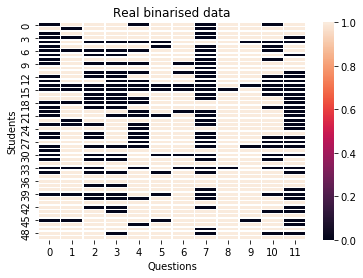

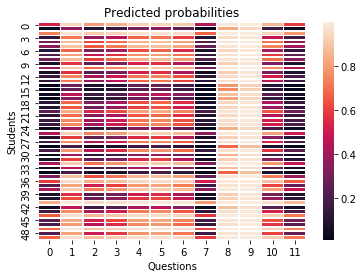

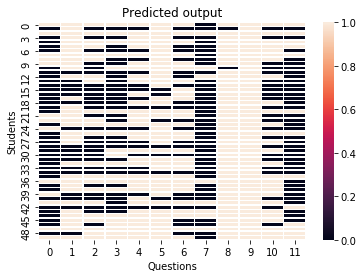

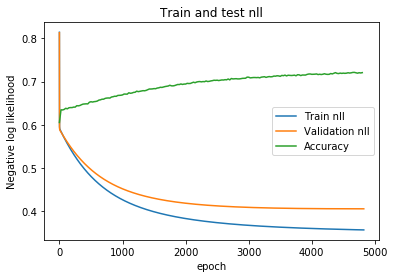

ADP vectorised (rate=0.00025, iters=4825, binarise=mid, shuffle=True) -> accuracy: 72.02324867248535, confusion matrix: 
[[42.29934073 13.30664853]
 [14.67010255 29.72390819]]


In [7]:
my_ADP = ADP(data_ts, testset_row_range, testset_col_range)
my_ADP.run(learning_rate=0.00025, iters=4825) #4850 old paper

0 tensor(593113.9375, grad_fn=<NegBackward0>) tensor(66041.5391, grad_fn=<NegBackward0>) 60.01465320587158
25 tensor(361870.8750, grad_fn=<NegBackward0>) tensor(40123.2539, grad_fn=<NegBackward0>) 63.51419687271118
50 tensor(357307.7500, grad_fn=<NegBackward0>) tensor(39699.0508, grad_fn=<NegBackward0>) 63.54515552520752
75 tensor(352897.8750, grad_fn=<NegBackward0>) tensor(39289.0156, grad_fn=<NegBackward0>) 63.69645595550537
100 tensor(348637.4688, grad_fn=<NegBackward0>) tensor(38892.8906, grad_fn=<NegBackward0>) 63.774943351745605
125 tensor(344522.8125, grad_fn=<NegBackward0>) tensor(38510.3359, grad_fn=<NegBackward0>) 63.798487186431885
150 tensor(340550.1250, grad_fn=<NegBackward0>) tensor(38141.0156, grad_fn=<NegBackward0>) 63.87261152267456
175 tensor(336715.5938, grad_fn=<NegBackward0>) tensor(37784.5781, grad_fn=<NegBackward0>) 63.991206884384155
200 tensor(333015.2812, grad_fn=<NegBackward0>) tensor(37440.6641, grad_fn=<NegBackward0>) 63.95370960235596
225 tensor(329445.250

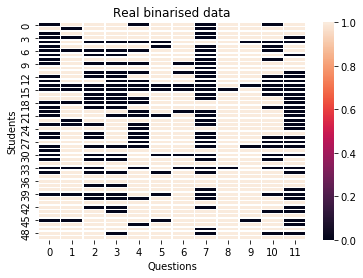

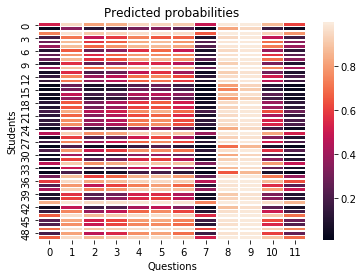

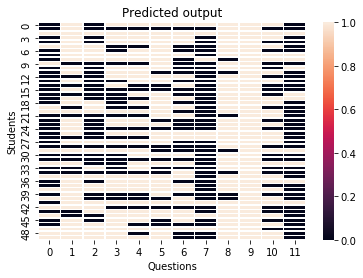

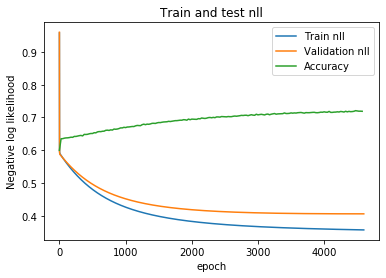

Interactive (rate=0.00025, iters=4600) -> accuracy: 72.08428978919983, confusion matrix: 
[[42.30762523 13.29836403]
 [14.61734338 29.77666736]]


In [9]:
my_I = I(data_ts, testset_row_range, testset_col_range)
my_I.run(learning_rate=0.00025, iters=4600, dimension=2, validation=0.9)

In [15]:
print(my_ADP.trained_bs)
print(my_ADP.trained_bq)

print(my_I.trained_bs)
print(my_I.trained_bq)
print(my_I.trained_xs)
print(my_I.trained_xq)


tensor([-0.4606, -0.9064, -1.3648,  ...,  0.0849,  2.0293,  1.0008],
       requires_grad=True)
tensor([-0.1291, -2.4862, -0.2819, -0.7805, -5.1216, -3.3201,  1.2655, -2.3919,
        -0.6214, -1.0483, -1.6419,  2.2636, -2.6095,  0.1505, -1.3253, -0.9743,
        -0.0540,  0.1190, -0.3991, -2.9540,  2.3150,  3.6298, -0.9024, -2.3523],
       requires_grad=True)
tensor([-0.4890, -0.8916, -1.2778,  ...,  0.1141,  1.9379,  1.0507],
       requires_grad=True)
tensor([-0.1291, -2.4734, -0.2809, -0.7768, -5.1447, -3.3059,  1.2580, -2.3864,
        -0.6181, -1.0421, -1.6329,  2.2488, -2.6007,  0.1488, -1.3247, -0.9744,
        -0.0584,  0.1189, -0.4019, -2.9571,  2.3061,  3.6201, -0.9020, -2.3465],
       requires_grad=True)
tensor([[ 0.7094,  0.3711,  0.3799,  ..., -0.0203, -0.0188,  0.0589],
        [ 0.2794, -0.6930, -2.4131,  ..., -0.7928,  1.1106, -1.1174]],
       requires_grad=True)
tensor([[ 0.0251, -0.0142,  0.0118,  0.0456, -0.0463, -0.0614,  0.0173, -0.0167,
         -0.0054, -0.02

In [6]:
my_I_without_bias = I_without_bias(data_ts, testset_row_range, testset_col_range, seed_number=1001)
my_I_without_bias.run(learning_rate=0.00025, iters=10000, dimension=1, validation=0.9)

tensor([[-0.8172, -0.8172, -0.8172,  ..., -0.4347, -0.4347, -0.4347]],
       grad_fn=<IndexSelectBackward0>)
tensor([[-0.0117,  0.0243, -0.6139,  ...,  0.0082,  0.0270, -0.0107]],
       grad_fn=<MulBackward0>)
tensor([0.4971, 0.5061, 0.3512,  ..., 0.5021, 0.5067, 0.4973],
       grad_fn=<MulBackward0>)
0 tensor(509572.9375, grad_fn=<NegBackward0>) tensor(56669.5938, grad_fn=<NegBackward0>) 49.937647581100464
tensor([[-0.8131, -0.8131, -0.8131,  ..., -0.4325, -0.4325, -0.4325]],
       grad_fn=<IndexSelectBackward0>)
tensor([[-0.0166,  0.0168, -0.0065,  ...,  0.0069,  0.0017, -0.0167]],
       grad_fn=<MulBackward0>)
tensor([0.4958, 0.5042, 0.4984,  ..., 0.5017, 0.5004, 0.4958],
       grad_fn=<MulBackward0>)
25 tensor(443409.6875, grad_fn=<NegBackward0>) tensor(49243.2812, grad_fn=<NegBackward0>) 49.94418919086456
tensor([[-0.8093, -0.8093, -0.8093,  ..., -0.4305, -0.4305, -0.4305]],
       grad_fn=<IndexSelectBackward0>)
tensor([[-0.0170,  0.0167, -0.0068,  ...,  0.0071,  0.0016, -0

RuntimeError: Expected p_in >= 0 && p_in <= 1 to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.)

In [10]:
print(my_I.trained_bs)
print(my_I.trained_bq)
print(my_I.trained_xs)
print(my_I.trained_xq)

tensor([-0.4635, -0.8912, -1.4341,  ...,  0.2783,  2.1352,  1.3564],
       requires_grad=True)
tensor([-0.1347, -2.7449, -0.3026, -0.8518, -6.3963, -3.7331,  1.3952, -2.7048,
        -0.6717, -1.1369, -1.7937,  2.4784, -2.7525,  0.1681, -1.4695, -1.1461,
        -0.0767,  0.1461, -0.4415, -3.2780,  2.5025,  4.0749, -0.9698, -2.5064],
       requires_grad=True)
tensor([[ 0.7177,  0.2196,  0.4573,  ...,  0.1127, -0.0945,  0.1746],
        [-0.3771, -0.9714, -1.4693,  ..., -0.7895,  1.2488, -1.0549]],
       requires_grad=True)
tensor([[ 0.1020, -0.1514,  0.0847,  0.1477, -0.3146, -0.2535,  0.0471, -0.0564,
         -0.0271, -0.1187, -0.0970, -0.2123, -0.1490,  0.1897,  0.1468, -0.2093,
          0.5121, -0.0264,  0.3433,  0.5475, -0.4013, -0.6712,  0.3236,  0.1953],
        [ 0.0933,  0.3086,  0.0677,  0.1291,  1.2947,  0.4825,  0.1645,  0.6093,
          0.0957,  0.0431,  0.2055, -0.1767, -0.2175,  0.1589, -0.6752, -1.0192,
         -0.1523,  0.5529, -0.1622,  0.3428,  0.1398, -0.5915,